# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard


# Loading datasets and displaying basic statistics

In [2]:
train_data = pd.read_csv('data.csv')
test_data = pd.read_csv('output.csv')

In [3]:
print("Training Data Statistics:")
print(train_data.describe())

Training Data Statistics:
              price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  4.600000e+03  4600.000000  4600.000000   4600.000000  4.600000e+03   
mean   5.519630e+05     3.400870     2.160815   2139.346957  1.485252e+04   
std    5.638347e+05     0.908848     0.783781    963.206916  3.588444e+04   
min    0.000000e+00     0.000000     0.000000    370.000000  6.380000e+02   
25%    3.228750e+05     3.000000     1.750000   1460.000000  5.000750e+03   
50%    4.609435e+05     3.000000     2.250000   1980.000000  7.683000e+03   
75%    6.549625e+05     4.000000     2.500000   2620.000000  1.100125e+04   
max    2.659000e+07     9.000000     8.000000  13540.000000  1.074218e+06   

            floors   waterfront         view    condition   sqft_above  \
count  4600.000000  4600.000000  4600.000000  4600.000000  4600.000000   
mean      1.512065     0.007174     0.240652     3.451739  1827.265435   
std       0.538288     0.084404     0.778405     0.677230 

# Data preprocessing

In [4]:
train_data.drop(columns=['date', 'street', 'city', 'statezip', 'country'], inplace=True)
test_data.drop(columns=['date', 'street', 'city', 'statezip', 'country'], inplace=True)

In [5]:
X_train = train_data.drop(columns=['price'])
y_train = train_data['price']
X_test = test_data.drop(columns=['price'])
y_test = test_data['price']

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining a function to evaluate model performance

In [7]:
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print("Mean Squared Error:", mse)
    print("R2 Score:", r2)
    return mse, r2

# Linear Regression model

In [8]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)


LinearRegression()

In [9]:
print("\nLinear Regression:")
lr_mse, lr_r2 = evaluate_model(lr_model, X_test_scaled, y_test)


Linear Regression:
Mean Squared Error: 248628273396.3354
R2 Score: 0.2177576366505054


# Ridge Regression model with hyperparameter tuning

In [10]:
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

In [11]:
ridge_param_grid = {'ridge__alpha': [0.01, 0.1, 1.0, 10.0]}
ridge_grid_search = GridSearchCV(ridge_pipeline, ridge_param_grid, cv=5, scoring='neg_mean_squared_error')

In [12]:
ridge_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [0.01, 0.1, 1.0, 10.0]},
             scoring='neg_mean_squared_error')

In [13]:
print("\nRidge Regression:")
print("Best Parameters:", ridge_grid_search.best_params_)


Ridge Regression:
Best Parameters: {'ridge__alpha': 10.0}


In [14]:
ridge_model = ridge_grid_search.best_estimator_
ridge_mse, ridge_r2 = evaluate_model(ridge_model, X_test, y_test)

Mean Squared Error: 248628505809.37787
R2 Score: 0.217756905425029


# Lasso Regression model with feature selection

In [15]:
lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso())
])

In [16]:
lasso_param_grid = {'lasso__alpha': [0.01, 0.1, 1.0, 10.0]}
lasso_grid_search = GridSearchCV(lasso_pipeline, lasso_param_grid, cv=5, scoring='neg_mean_squared_error')

In [17]:
lasso_grid_search.fit(X_train, y_train)

C:\Users\RAHULSRI\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.188e+13, tolerance: 1.364e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\RAHULSRI\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.767e+13, tolerance: 1.345e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\RAHULSRI\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.859e+13,

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': [0.01, 0.1, 1.0, 10.0]},
             scoring='neg_mean_squared_error')

In [18]:
print("\nLasso Regression:")
print("Best Parameters:", lasso_grid_search.best_params_)


Lasso Regression:
Best Parameters: {'lasso__alpha': 10.0}


In [19]:
lasso_model = lasso_grid_search.best_estimator_
lasso_mse, lasso_r2 = evaluate_model(lasso_model, X_test, y_test)

Mean Squared Error: 248656629602.8461
R2 Score: 0.21766842143095866


# Random Forest Regression model with hyperparameter tuning

In [20]:
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor())
])

In [21]:
rf_param_grid = {'rf__n_estimators': [50, 100, 200], 'rf__max_depth': [None, 10, 20]}
rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, scoring='neg_mean_squared_error')

In [22]:
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf', RandomForestRegressor())]),
             param_grid={'rf__max_depth': [None, 10, 20],
                         'rf__n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [23]:
print("\nRandom Forest Regression:")
print("Best Parameters:", rf_grid_search.best_params_)


Random Forest Regression:
Best Parameters: {'rf__max_depth': 10, 'rf__n_estimators': 100}


In [24]:
rf_model = rf_grid_search.best_estimator_
rf_mse, rf_r2 = evaluate_model(rf_model, X_test, y_test)

Mean Squared Error: 53741265055.2075
R2 Score: 0.8309174833098578


# Deep Neural Network model using TensorFlow

In [25]:
dnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(1)
])

C:\Users\RAHULSRI\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:73: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
dnn_model.compile(optimizer='adam', loss='mean_squared_error')

In [27]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [28]:
dnn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stop])

Epoch 1/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 442680934400.0000 - val_loss: 1356952764416.0000
Epoch 2/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 433333272576.0000 - val_loss: 1356943982592.0000
Epoch 3/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 429309362176.0000 - val_loss: 1356930875392.0000
Epoch 4/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 427924127744.0000 - val_loss: 1356912918528.0000
Epoch 5/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 469889941504.0000 - val_loss: 1356886310912.0000
Epoch 6/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 437398634496.0000 - val_loss: 1356848824320.0000
Epoch 7/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 430839431168.0000 - val_loss: 1356807929856.0000
Epoch 8/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 422300614656.0000 - val_loss: 1356757073920.0000
Epoch 9/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 487332184064.0000 - val_loss: 1356711460864.0000
Epoch 10/50
115/115

In [29]:
print("\nDeep Neural Network:")
dnn_mse, dnn_r2 = evaluate_model(dnn_model, X_test_scaled, y_test)


Deep Neural Network:
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Mean Squared Error: 617442975730.737
R2 Score: -0.9426191799161461


# Visualizing results

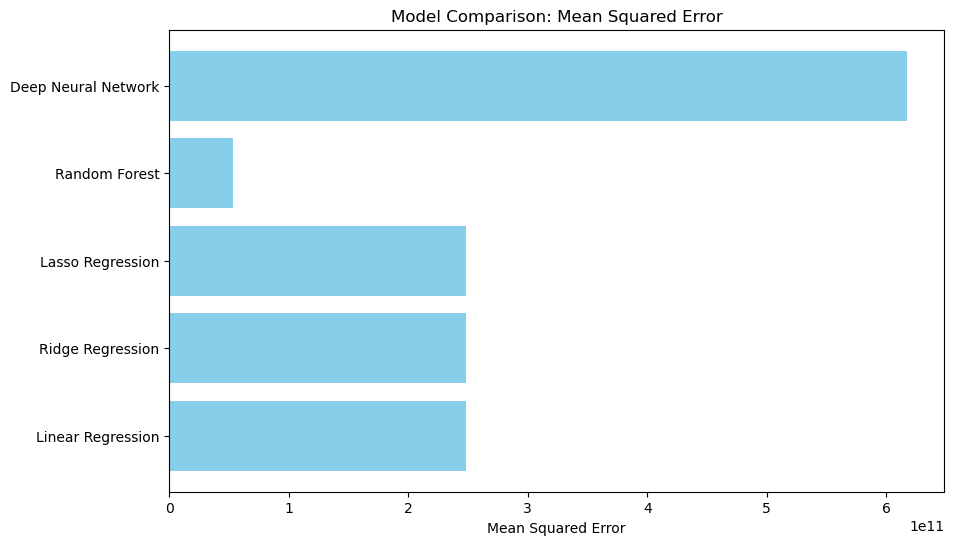

In [30]:
plt.figure(figsize=(10, 6))
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Random Forest', 'Deep Neural Network']
mse_scores = [lr_mse, ridge_mse, lasso_mse, rf_mse, dnn_mse]
r2_scores = [lr_r2, ridge_r2, lasso_r2, rf_r2, dnn_r2]
plt.barh(models, mse_scores, color='skyblue')
plt.xlabel('Mean Squared Error')
plt.title('Model Comparison: Mean Squared Error')
plt.show()

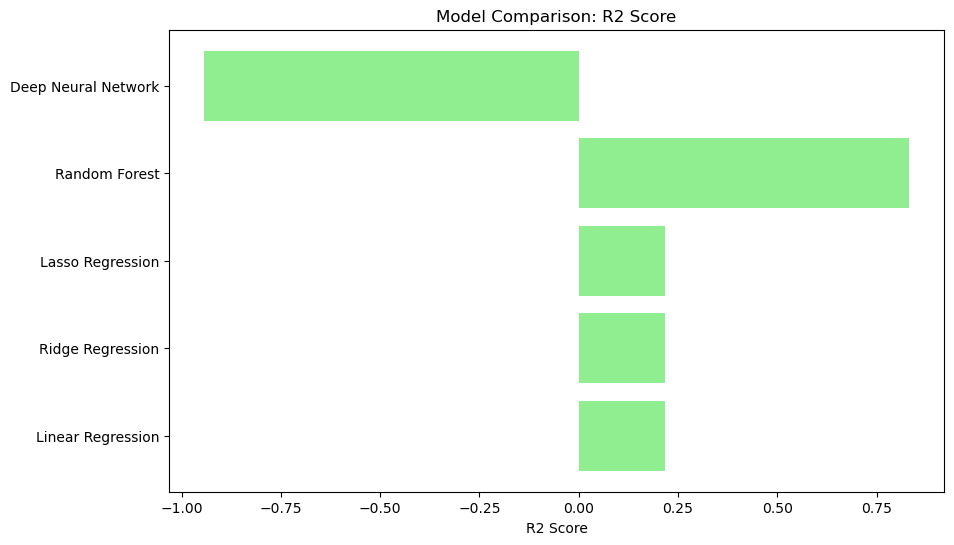

In [31]:
 plt.figure(figsize=(10, 6))
plt.barh(models, r2_scores, color='lightgreen')
plt.xlabel('R2 Score')
plt.title('Model Comparison: R2 Score')
plt.show()

# Prediction

In [32]:
lr_predictions = lr_model.predict(X_test_scaled)
lr_predictions

array([ 359492.95366821, 1229531.45175614,  512159.66379015, ...,
        732236.246128  ,  418498.44214675,  411110.65095754])

In [33]:
ridge_predictions = ridge_model.predict(X_test)
ridge_predictions

array([ 359637.22544582, 1229003.7912389 ,  511957.97974575, ...,
        731647.90541762,  418911.19705927,  411485.66919269])

In [34]:
lasso_predictions = lasso_model.predict(X_test)
lasso_predictions

array([ 359486.11172025, 1229458.27626394,  512139.11438479, ...,
        732226.76366919,  418588.10544335,  411085.01394377])

In [35]:
rf_predictions = rf_model.predict(X_test)
rf_predictions

array([ 342434.85561886, 2122731.01275397,  411779.9139669 , ...,
        656881.16133776,  396132.2687918 ,  320322.95803575])

In [36]:
dnn_predictions = dnn_model.predict(X_test_scaled)
dnn_predictions

144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[ 1749.4784],
       [10073.96  ],
       [ 3123.3096],
       ...,
       [ 5331.556 ],
       [ 1897.5684],
       [ 2058.8896]], dtype=float32)